# Estatística - Probabilidade e Amostragem
- Fernanda Soares Lima - Turma 7 | Data Analytics <br>
Squad Katherine Johnson

Você é uma pesquisadora desenvolvendo uma análise sobre as
características da força de trabalho nos estados brasileiros. Responda as
perguntas abaixo:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [5]:
df= pd.read_csv("populacao_brasileira.csv", sep=',')
print(df.head(6))

df_limpo= df.drop(columns=['Unnamed: 0'])
df_limpo.head(6)

   Unnamed: 0 estado  idade escolaridade nível de proficiência em inglês  \
0           0     MA     56  Fundamental                   Intermediário   
1           1     BA     46     Superior                          Básico   
2           2     AM     32  Fundamental                   Intermediário   
3           3     CE     60     Superior                          Básico   
4           4     SE     25  Fundamental                        Avançado   
5           5     AM     38  Fundamental                        Avançado   

     renda sexo  
0  4006.29    F  
1  2423.11    M  
2  3835.69    M  
3  1870.29    M  
4  3529.80    M  
5  4441.57    F  


,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M
5,AM,38,Fundamental,Avançado,4441.57,F


Fiz uma limpeza já que a primeira linha era o número que veio do csv, a ordem permanece

In [6]:
df.columns

Index(['Unnamed: 0', 'estado', 'idade', 'escolaridade',
       'nível de proficiência em inglês', 'renda', 'sexo'],
      dtype='object')

In [7]:
df_limpo.describe()

,idade,renda
count,1000.000000,1000.000000
mean,40.986000,3082.537180
std,13.497852,996.572239
min,18.000000,103.740000
25%,29.000000,2425.815000
50%,42.000000,3076.415000
75%,52.000000,3714.487500
max,64.000000,5632.380000


In [8]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   estado                           1000 non-null   object 
 1   idade                            1000 non-null   int64  
 2   escolaridade                     1000 non-null   object 
 3   nível de proficiência em inglês  1000 non-null   object 
 4   renda                            1000 non-null   float64
 5   sexo                             1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.


In [9]:
ingles_fluente=df_limpo[df_limpo['nível de proficiência em inglês']=='Avançado']
ingles_fluente.shape

(344, 6)

In [10]:
prob_complementar_fluencia= (1-(ingles_fluente.shape[0]/len(df_limpo)))
print(prob_complementar_fluencia)

print(f'A probabilidade complementar é de {round(prob_complementar_fluencia * 100, 2)}%.')

0.656
A probabilidade complementar é de 65.6%.


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?


In [11]:
df_estados= df_limpo[(df_limpo['estado']=='AL') | (df_limpo['estado']=='PA')]
df_estados.head()

df_renda_alta= df_estados[df_estados['renda']>5000]

prob_renda_alta_estados= len(df_renda_alta)/len(df_estados)

print(f'A probabilidade de escolher alguém aleatório de Alagoas ou Pará e ter renda superior a 5 mil é {prob_renda_alta_estados*100:.2f}%')

print('\nAcredito que a probabilidade da questão queria ver dentro desses dois estados, por isso fiz a partir deles, não do geral')

A probabilidade de escolher alguém aleatório de Alagoas ou Pará e ter renda superior a 5 mil é 5.06%

Acredito que a probabilidade da questão queria ver dentro desses dois estados, por isso fiz a partir deles, não do geral


3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?


In [118]:
df_amazonas= df_limpo[df_limpo['estado']=='AM']
df_amazonas

filtro_sup_amazonas=df_amazonas[df_amazonas['escolaridade'].isin(['Superior','Pós-graduação'])]
filtro_sup_amazonas

prob_superior_amazonas= (len(filtro_sup_amazonas)/len(df_amazonas))
print(f'A probabilidade de alguém ter superior no Estado do Amazonas é: {prob_superior_amazonas*100:.2f}%')

A probabilidade de alguém ter superior no Estado do Amazonas é: 55.26%


Aqui, calculei a probabilidade de uma pessoa selecionada aleatoriamente no Amazonas ter ensino superior completo. Dividi o número de pessoas com ensino superior pelo número total de pessoas no estado do Amazonas. O valor de 0.2368 reflete que 23,68% das pessoas do Amazonas no dataset têm ensino superior completo.

In [119]:
# Quinta pessoa que conversar já amazonense

print(prob_superior_amazonas)
prob_quinta_pessoa = stats.geom.pmf(k=5, p=prob_superior_amazonas)
print(f'Probabilidade da quinta ser amazonense e ter ensino superior completo: {prob_quinta_pessoa:.2%}')

0.5526315789473685
Probabilidade da quinta ser amazonense e ter ensino superior completo: 2.21%


apliquei a distribuição geométrica para resolver essa parte, pois não sabia de outra forma e vi a Jéssica fazer assim em uma questão, para modelar a quantidade de tentativas até obter o primeiro sucesso em um experimento de Bernoulli (nesse caso, o "sucesso" é a pessoa ter ensino superior completo)

Isso significa que a probabilidade de após conversar com 4 pessoas que não têm ensino superior, a quinta pessoa que você conversa ter ensino superior completo. O valor de 8,03% faz sentido dentro dessa lógica.

4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?


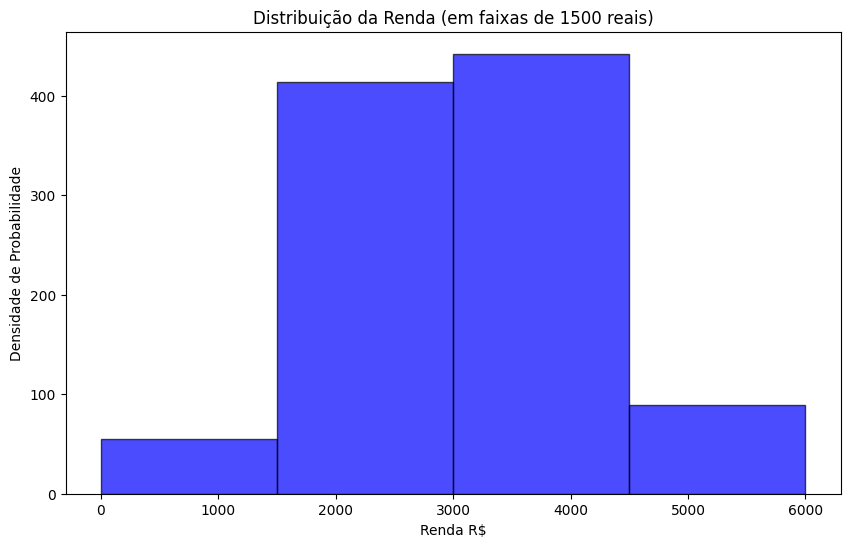

O histograma mostra a densidade de probabilidade, ou seja,a frequência relativa em cada faixa de renda.

Assim, é possível visualizar qual faixa de renda concentra a maioria das pessoas, nesse caso entre 3000 mil a 4500 mil reais.


In [122]:
# Função de Densidade de Probabilidade = Porcentagem de pessoas / Largura da Faixa

df_limpo['renda'].describe()
intervalo=1500
intervalos= np.arange(0, df_limpo['renda'].max()+intervalo,intervalo)

#contagem_por_faixa,_=np.histogram

plt.figure(figsize=(10,6))
plt.hist(df_limpo['renda'],bins=intervalos,color='blue',edgecolor='black',alpha=0.7)
plt.title('Distribuição da Renda (em faixas de 1500 reais)')
plt.xlabel('Renda R$')
plt.ylabel('Densidade de Probabilidade')
plt.show()

print("O histograma mostra a densidade de probabilidade, ou seja,a frequência relativa em cada faixa de renda.\n")
print("Assim, é possível visualizar qual faixa de renda concentra a maioria das pessoas, nesse caso entre 3000 mil a 4500 mil reais.")

5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico

In [15]:
media_renda = df_limpo['renda'].mean()
variancia_renda = df_limpo['renda'].var()

print(f'Média da renda: {media_renda:.2f}')
print(f'Variância da renda: {variancia_renda:.2f}')

Média da renda: 3082.54
Variância da renda: 993156.23


In [16]:
renda_min = df_limpo['renda'].min()
renda_max = df_limpo['renda'].max()
x = np.arange(renda_min, renda_max, 100)

desvio_padrao_renda = df_limpo['renda'].std()
# MANUALMENTE 
y = (1 / (desvio_padrao_renda * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - media_renda) / desvio_padrao_renda) ** 2)


# FUNÇÃO distribuição normal com a média e desvio padrão/raiz da variancia da amostra
y = stats.norm.pdf(x, media_renda, np.sqrt(variancia_renda))



Text(0, 0.5, 'Densidade de Probabilidade')

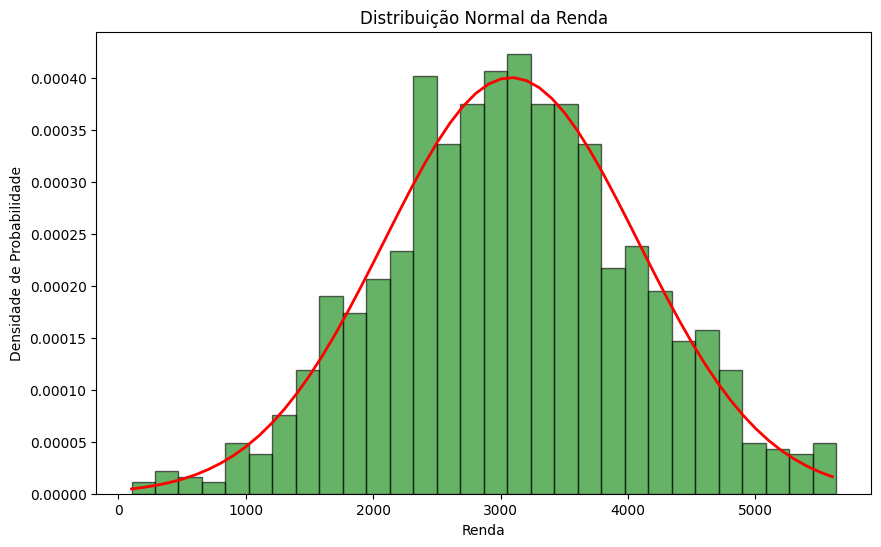

In [17]:
plt.figure(figsize=(10,6))
plt.hist(df_limpo['renda'], bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

plt.plot(x, y, 'r-', lw=2)

plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')

6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?


In [18]:
df_limpo['escolaridade'].str.get_dummies()

,Fundamental,Médio,Pós-graduação,Superior
0,1,0,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
995,0,1,0,0
996,1,0,0,0
997,0,0,1,0
998,1,0,0,0


In [19]:
pessoas_com_pos=df_limpo[df_limpo['escolaridade']=='Pós-graduação']
prob_pessoas_pos=len(pessoas_com_pos)/len(df_limpo)
print(f'A probabilidade de alguém ter pós-graduação é: {prob_pessoas_pos*100:.2f}%')
print(prob_pessoas_pos)

A probabilidade de alguém ter pós-graduação é: 25.30%
0.253


In [130]:
# Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?


# prob_pessoas_amostra=(243000/1000000)*100
# print(f'A probabilidade de alguém ter pós é: {prob_pessoas_amostra:.2f}%')


# probabilidade binomial
n = 1000000 
k = 243000  
p = prob_pessoas_pos  # usar valor obtido antes

# Média e desvio padrão da distribuição normal aproximada
media = n * p
desvio_padrao = (n * p * (1 - p)) ** 0.5
# #print(desvio_padrao)

# probabilidade = stats.norm(media, desvio_padrao).pdf(k)

# # print(f'Probabilidade de encontrar 243 mil pessoas com pós-graduação: {probabilidade:.6f}')


# desvio_padrao= np.sqrt(n*p*(1-p))
# formula_z= (k-media)/desvio_padrao
# formula_z


prob_pos_grad= stats.binom.pmf(k,n,p)
prob_pos_grad_media= stats.binom.pmf(media,n,p)


print(f'''\n    A probabilidade de encontrar exatamente 243.000 pessoas com pós-graduação, dado que a média esperada é 253.000 e o desvio padrão é 434.73, é extremamente baixa. 
      Isso acontece porque a quantidade de 243.000 está muito longe do valor esperado para uma amostra desse tamanho.
      Fazendo pela função "stats.binom.pmf(k,n,p)" retornou um valor muito baixo {prob_pos_grad}, mas se fizer stats.binom.pmf(media,n,p) utilizando pela média o valor é {prob_pos_grad} ''')


    A probabilidade de encontrar exatamente 243.000 pessoas com pós-graduação, dado que a média esperada é 253.000 e o desvio padrão é 434.73, é extremamente baixa. 
      Isso acontece porque a quantidade de 243.000 está muito longe do valor esperado para uma amostra desse tamanho.
      Fazendo pela função "stats.binom.pmf(k,n,p)" retornou um valor muito baixo 1.1104854289794913e-119, mas se fizer stats.binom.pmf(media,n,p) utilizando pela média o valor é 1.1104854289794913e-119 


7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade

escolaridade
Fundamental      266
Médio            238
Superior         243
Pós-graduação    253
Name: count, dtype: int64
escolaridade
Fundamental      0.266
Médio            0.504
Superior         0.747
Pós-graduação    1.000
Name: count, dtype: float64


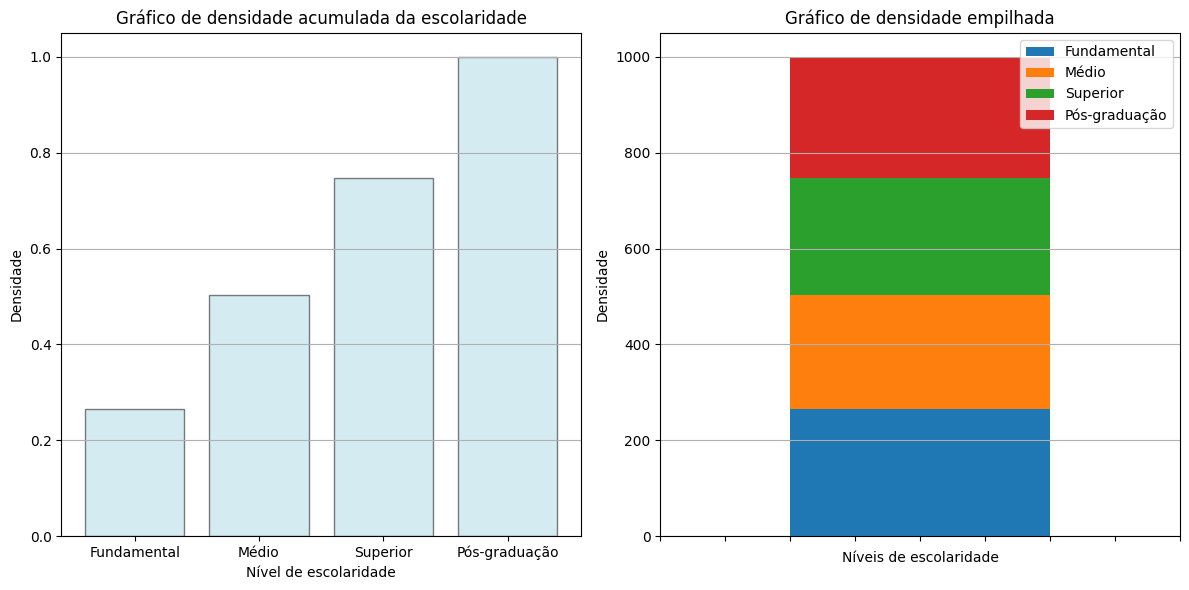

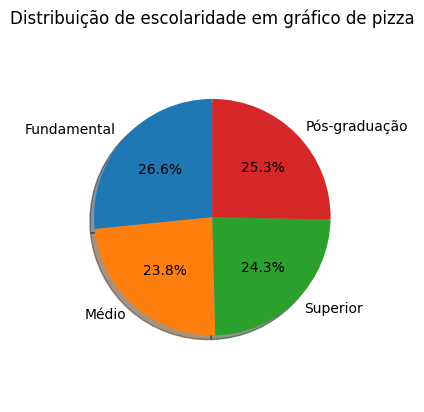

In [77]:
lista_ensino=['Fundamental','Médio','Superior','Pós-graduação']

#df_limpo['escolaridade'].value_counts().sort_index(lista_ensino)

df_limpo['escolaridade'] = pd.Categorical(df_limpo['escolaridade'], categories=lista_ensino, ordered=True)

escolaridade_counts = df_limpo['escolaridade'].value_counts().sort_index()

print(escolaridade_counts)

densidade_cum_escolaridade = escolaridade_counts.cumsum() / escolaridade_counts.sum()

print(densidade_cum_escolaridade)
#fig, ax = plt.subplots(2,1)

#plt.figure(figsize=(10,6))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].bar(lista_ensino,densidade_cum_escolaridade, alpha=0.5,color='lightblue', edgecolor='black')
ax[0].set_title('Gráfico de densidade acumulada da escolaridade')
ax[0].set_xlabel('Nível de escolaridade')
ax[0].set_ylabel('Densidade')
ax[0].grid(axis='y')

#plt.show()

# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# sizes = [15, 30, 45, 10]

# fig, ax = plt.subplots()
# ax.pie(densidade_cum_escolaridade, labels=lista_ensino)

r = [0]  # Criar uma única barra na posição 0
barWidth = 0.1 # Largura da barra

# Acumulando as alturas dos níveis
bottom = np.zeros(len(r))  # Inicialmente, a base (bottom) é zero

# Criar uma barra empilhada para cada nível
for i in range(len(lista_ensino)):
    ax[1].bar(r, escolaridade_counts.iloc[i], bottom=bottom, label=lista_ensino[i], width=barWidth)
    bottom += escolaridade_counts.iloc[i]  # Atualizar o bottom para empilhar
    ax[1].set_title('Gráfico de densidade empilhada')
    ax[1].set_xlabel('Níveis de escolaridade')
    ax[1].set_ylabel('Densidade')
    ax[1].legend(loc="upper right")
    ax[1].set_xlim(-0.1, 0.1) 
    ax[1].set_xticklabels([])  # Remove os labels do eixo X
  
plt.grid(axis='y')

plt.tight_layout() # serve pra não sobrepor

plt.show()

plt.pie(escolaridade_counts, labels=lista_ensino, autopct='%1.1f%%',shadow=True, startangle=90, radius=0.8)
plt.title('Distribuição de escolaridade em gráfico de pizza')
plt.show()



Fiquei brincando pra conhecer mais outros gráficos

8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?


In [61]:
df_limpo['nível de proficiência em inglês'].value_counts()

nível de proficiência em inglês
Avançado         344
Intermediário    329
Básico           327
Name: count, dtype: int64

In [79]:
nivel_en_intermediario= df_limpo[df_limpo['nível de proficiência em inglês']=='Intermediário']

prop_en_intermediario=len(nivel_en_intermediario)/len(df_limpo)
prop_en_intermediario

prop_complementar_en_int=1-prop_en_intermediario
prop_complementar_en_int

0.671

In [85]:
nivel_en_intermediario

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
2,AM,32,Fundamental,Intermediário,3835.69,M
6,DF,56,Médio,Intermediário,528.36,F
10,AC,28,Superior,Intermediário,3371.15,M
11,SC,41,Pós-graduação,Intermediário,2396.01,M
...,...,...,...,...,...,...
984,AP,31,Médio,Intermediário,2773.52,F
985,ES,55,Fundamental,Intermediário,2040.56,M
990,TO,60,Fundamental,Intermediário,2511.15,M
997,GO,27,Pós-graduação,Intermediário,1405.30,F


In [83]:
# Acredito que o nivel de confiança vá ser 95% o Z é 1,96 pra calculos

#  Z*raiz((p * (1 - p) )/ n )

margem_erro=1.96*np.sqrt((prop_en_intermediario*prop_complementar_en_int)/len(df_limpo))
print(f"A Margem de erro amostral da proporção populacional usando significância de 95% é aproximadamente {margem_erro:.4f} ou {margem_erro*100:.3}%")

A Margem de erro amostral da proporção populacional usando significância de 95% é aproximadamente 0.0291 ou 2.91%


In [ ]:
# # Achei que a professora fazia assim:

# n=len(prop_en_intermediario)
# a = 0.05
# z = stats.norm.ppf(1-a/2,0,1)

# ### n = ((z*sigma_linha)/me)**2

# ### margem , me = 2%
# me = 0.02
# n = round(((z*sigma_linha)/me)**2,0)
# print("O tamanho da amostra serÃ¡ de "+str(n)+" para margem de erro de 2% e 5% de significancia")

Tive dúvidas em relação ao cálculo para isso, mas percebi que a margem de erro é pela proporção então fiz a proporção e o complemento para o cálculo

Z*raiz((p * (1 - p) )/ n )

9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?


In [87]:
df_limpo['renda'].describe()

count    1000.000000
mean     3082.537180
std       996.572239
min       103.740000
25%      2425.815000
50%      3076.415000
75%      3714.487500
max      5632.380000
Name: renda, dtype: float64

In [132]:
renda_media=df_limpo['renda'].describe().loc['mean']

populacao_renda_acima=df_limpo[df_limpo['renda']>(renda_media+1000)]

print(len(populacao_renda_acima))

prop_renda_acima=len(populacao_renda_acima)/len(df_limpo)
print(prop_renda_acima)

n=len(df_limpo)
k=60

# n, p, loc=0  
# n é tentativas, p a probabilidade de sucesso
prob_60_pessoas_renda_acima=stats.binom.pmf(k,n,prop_renda_acima)
print(f"A probabilidade de encontrar 60 pessoas com renda mil reais superior à média é: {prob_60_pessoas_renda_acima}%")

161
0.161
A probabilidade de 60 pessoas terem mil reais acima da média é: 1.099520565163774e-22%


O valor da probabilidade é muito pequeno, da ordem de x10^−22
O que significa que a chance de encontrar exatamente 60 pessoas com uma renda superior a mil reais acima da média em uma amostra de 1000 pessoas é praticamente zero.

In [105]:

prob_acumulada = stats.binom.cdf(60, len(df_limpo), prop_renda_acima)
print(f"A probabilidade acumulada de até 60 pessoas é: {prob_acumulada*100:.7f}%")

A probabilidade acumulada de até 60 pessoas é: 0.0000000%


In [108]:
renda_media = df['renda'].mean()
limite = renda_media + 1000

# Calcular a probabilidade de encontrar 60 pessoas com renda superior ao limite
# Primeiro, calcular a média e desvio padrão da renda
media = df['renda'].mean()
desvio_padrao = df['renda'].std()
print(media)
print(desvio_padrao)
# Calcular a probabilidade de uma pessoa ter renda superior ao limite
probabilidade_individual = 1 - stats.norm.cdf(limite, loc=media, scale=desvio_padrao)

print(probabilidade_individual)

# Para encontrar 60 pessoas com essa característica, assumimos uma distribuição binomial
n = len(df)  # número total de pessoas na população
k = 60       # número de pessoas que queremos encontrar

# A fórmula para a probabilidade de encontrar exatamente k pessoas é a binomial
# Para simplificar, estamos apenas calculando a probabilidade de encontrar ao menos k pessoas
# Isto pode ser feito com a fórmula acumulada da distribuição binomial
probabilidade_60_pessoas = 1 - stats.binom.cdf(k-1, n, probabilidade_individual)

print(f"A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é {probabilidade_60_pessoas:.4f}")

3082.5371800000003
996.572239312141
0.15782441468557806
A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é 1.0000


O valor é muito baixo, já que para uma população de 1000 pessoas, a expectativa seria que apenas cerca de 161 pessoas tivessem renda acima da média por mais de 1000 reais, tornando 60 um número improvável.

10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?

In [114]:
df_limpo['escolaridade']

0        Fundamental
1           Superior
2        Fundamental
3           Superior
4        Fundamental
           ...      
995            Médio
996      Fundamental
997    Pós-graduação
998      Fundamental
999         Superior
Name: escolaridade, Length: 1000, dtype: category
Categories (4, object): ['Fundamental' < 'Médio' < 'Superior' < 'Pós-graduação']

In [117]:
filtro_sudeste=df_limpo[df_limpo['estado'].isin(['RJ', 'SP', 'MG', 'ES'])]
filtro_homem= filtro_sudeste[filtro_sudeste['sexo']=='M']
filtro_ensino= filtro_homem[filtro_homem['escolaridade']=='Fundamental']
filtro_renda= filtro_ensino[filtro_ensino['renda']>2000]

filtro_renda

prob_sudeste_man_fundamental_renda=len(filtro_renda)/len(df_limpo)

print("A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é:",prob_sudeste_man_fundamental_renda)


A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é: 0.019
